This notebook captures a few tid bits while following the pennylane codebook tutorials. In the beginning we kept most of the exercise notes, however the saved codes are repeats of what we have in the code exercises. Later on we kept any code notes only if it deemed important to save for quick reference.

In [11]:
import pennylane as qml
import pennylane.numpy as np

### All about Qubits
https://pennylane.ai/codebook/01-introduction-to-quantum-computing/01-all-about-qubits/

In [8]:
import numpy as np

#### complete the function normalize_state

In [16]:
# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])


def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1
    factor = np.linalg.norm([alpha, beta])
    vec = np.array([alpha/factor, beta/factor])
    # RETURN A VECTOR
    return vec


print(normalize_state(complex(1,2), complex(3,4)))

[0.18257419+0.36514837j 0.54772256+0.73029674j]


#### Inner product and orthonormal bases

In [19]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE AND RETURN THE INNER PRODUCT
    return np.dot(np.conjugate(state_1), state_2)


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


#### measuring states

In [31]:
def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES
    p0 = sum(x.real**2 for x in state)
    p1 = sum(x.imag**2 for x in state)

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES
    return np.random.choice(2, size=num_meas, p=[p0, p1])


#### Applyinng Unitary, manually

In [32]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    return U @ state


#### A simple quantum algorithm



1. Initialize a qubit in state
1. Apply the provided operation U
1. Simulate measuring the output s

In [39]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE |0>
    return np.array([1.0,0])


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    state = apply_u(initialize_state())
    return measure_state(state, num_meas=100)


quantum_algorithm()


array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

### Single Qubit Gates - X and H
https://pennylane.ai/codebook/02-single-qubit-gates/01-x-and-h/

#### Flipping bits

In [5]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER
    if state:
        qml.PauliX(0)

    # APPLY U TO THE STATE
    qml.QubitUnitary(U, wires=0)

    return qml.state()


#### Uniform Superposition

On applying Hadamard Gate.

In [7]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE HADAMARD GATE
    qml.Hadamard(wires=0)

    # RETURN THE STATE
    return qml.state()


#### Combining X and H

Applying X, H etc, together.

In [8]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state
    if state:
        qml.PauliX(wires=0)

    # APPLY THE HADAMARD
    qml.Hadamard(wires=0)

    # RETURN THE STATE

    return qml.state()


print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))


[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


#### QNode with X and H

We commbine X, H etc. and build a circuit from scratch.

In [9]:
##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)

# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE
@qml.qnode(dev)
def apply_hxh(state):
    if state:
        qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()
    
# Print your results
print(apply_hxh(0))
print(apply_hxh(1))


[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


### Universal Gate Sets

Saving a few random code blocks that can be useful references later.

In [40]:
dev = qml.device("default.qubit", wires=1)

##################
# YOUR CODE HERE #
##################

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2

@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()


1.8.1 State preparation

In [5]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)

    return qml.state()


X and H

In [6]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER
    if state:
        qml.PauliX(0)

    # APPLY U TO THE STATE
    qml.QubitUnitary(U, wires=0)

    return qml.state()


## A quick lookup table
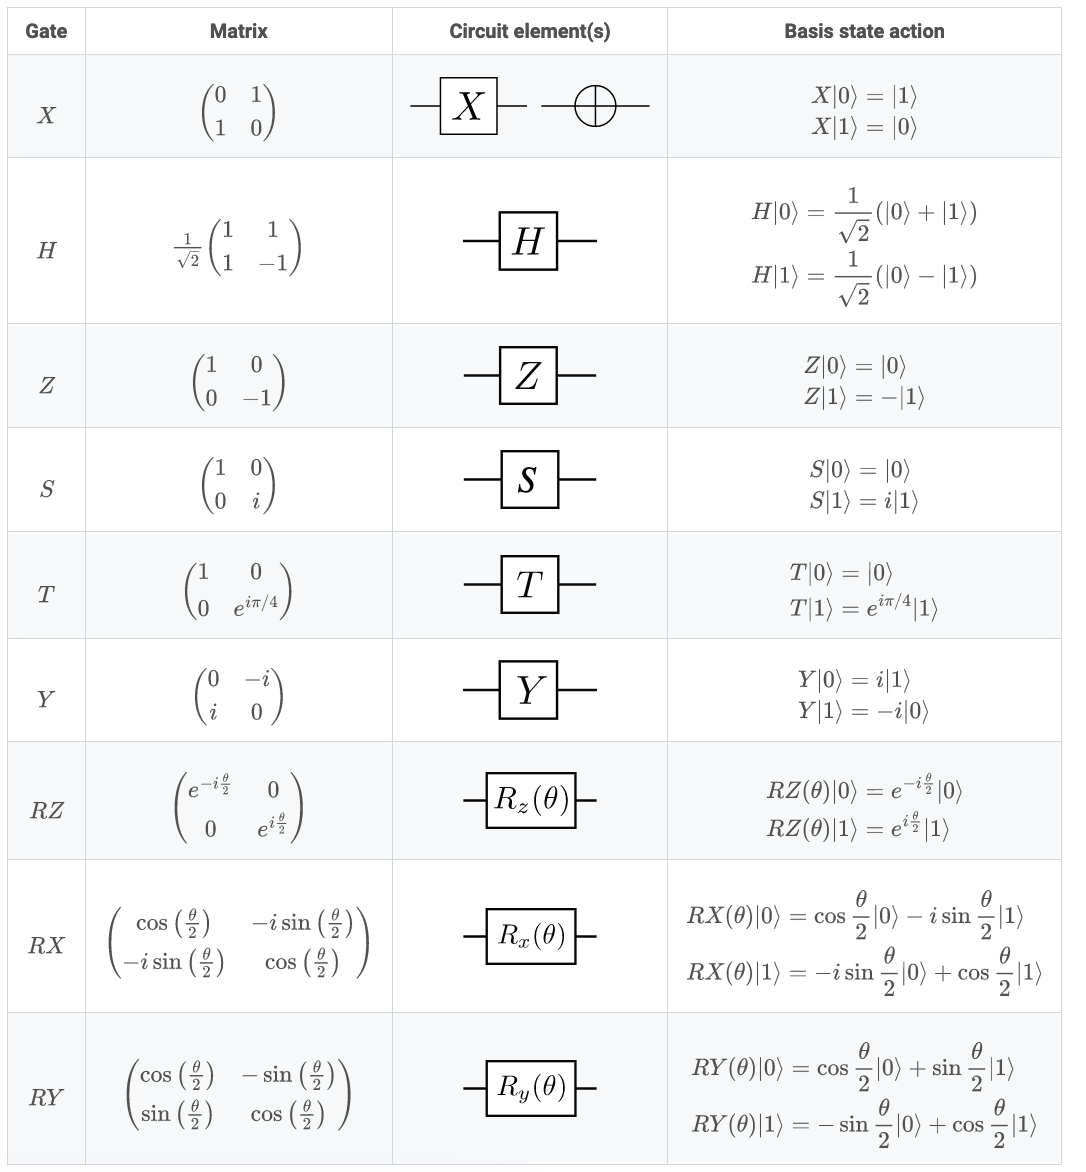